# Validation of the classification based on the WFsim #

2019/09/28

Authors:
 - Clark, Michael <clark632@purdue.edu>
 - Angevaare, Joran <j.angevaare@nikhef.nl>
 
**Update:**

2019/11/13

# Notebook is obsolete, please find the most recent notebooks here: #
<https://github.com/XENONnT/analysiscode/tree/master/PeakFinderTest>

## This notebook #
 
 
Possible extensions:
 - Add afterpulse boolian to the 'truth' info
 - Do the same for the other detector types

In [1]:
import strax
import straxen

In [2]:
import wfsim

In [3]:
import os

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_rows', 50)

We include ``recarray_tools.py`` here that is used to add columns and do things with structured arrays. 
Taken from:

    https://github.com/XENON1T/XeAnalysisScripts/tree/master/PeakFinderTest

In [6]:
from peak_classification.recarray_tools import *

In [7]:
from peak_classification.wfsim_utils import *

In [8]:
from peak_classification.match_peaks import *

Initize the wavefrom simulator

In [29]:
instructions_csv = "./test_uni.csv"
instructions = dict(event_rate = 50 , chunk_size=1, nchunk=20)
inst_to_csv(instructions, instructions_csv)

In [30]:
st = strax.Context(
    register=[wfsim.RawRecordsFromFax],
    config=dict(fax_file=instructions_csv),
    **straxen.contexts.common_opts)

In [31]:
class CustomPeakClassification(strax.Plugin):
    # Name of the data type this plugin provides
    provides = 'peak_classification'
    
    # Data types this plugin requires. Note we don't specify
    # what plugins should produce them: maybe the default PeakBasics
    # has been replaced by another AdvancedExpertBlabla plugin?
    depends_on = ('peak_basics')
    
    # Numpy datatype of the output 
    dtype = straxen.PeakClassification.dtype
    
    # Version of the plugin. Increment this if you change the algorithm.
    __version__ = '0.0.1'
    
    result = {}
    def compute(self, peaks):
        result = np.zeros(len(peaks), dtype=self.dtype)
        masks1 = (peaks['n_channels']>2) & (peaks['range_50p_area'] < 100)
        
        result['type'][masks1] = 1
        masks2 = (peaks['n_channels']>2) & (peaks['area'] > 20) & (peaks['range_50p_area'] > 100)
        result['type'][masks2] = 2

        return result

In [32]:
# Just some id from post-SR1, so the corrections work
run_id = '180519_1902'

In [33]:
if True or check_for_strax_data():
    !rm -r strax_data/
    print('deleted data')

peaks = st.make(run_id, 'raw_records')

deleted data


Simulating Raw Records:   5%|▌         | 102/2000 [00:59<22:24,  1.41it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 1


Simulating Raw Records:  10%|█         | 201/2000 [01:58<15:32,  1.93it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 2


Simulating Raw Records:  15%|█▌        | 302/2000 [02:59<14:41,  1.93it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 3


Simulating Raw Records:  20%|██        | 402/2000 [03:53<15:42,  1.70it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 4


Simulating Raw Records:  25%|██▌       | 502/2000 [04:48<08:50,  2.82it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 5


Simulating Raw Records:  30%|███       | 602/2000 [05:49<09:59,  2.33it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 6


Simulating Raw Records:  35%|███▌      | 702/2000 [06:43<09:24,  2.30it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 7


Simulating Raw Records:  40%|████      | 801/2000 [07:37<11:32,  1.73it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 8


Simulating Raw Records:  45%|████▌     | 902/2000 [08:21<06:45,  2.71it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 9


Simulating Raw Records:  50%|█████     | 1002/2000 [09:09<05:08,  3.24it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 10


Simulating Raw Records:  55%|█████▌    | 1102/2000 [10:06<06:34,  2.28it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 11


Simulating Raw Records:  60%|██████    | 1202/2000 [10:47<05:59,  2.22it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 12


Simulating Raw Records:  65%|██████▌   | 1301/2000 [11:37<06:07,  1.90it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 13


Simulating Raw Records:  70%|███████   | 1402/2000 [12:25<02:34,  3.86it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 14


Simulating Raw Records:  75%|███████▌  | 1502/2000 [13:13<04:14,  1.95it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 15


Simulating Raw Records:  80%|████████  | 1602/2000 [14:09<02:30,  2.64it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 16


Simulating Raw Records:  85%|████████▌ | 1701/2000 [14:56<01:38,  3.04it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 17


Simulating Raw Records:  90%|█████████ | 1802/2000 [15:48<01:53,  1.75it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 18


Simulating Raw Records:  95%|█████████▌| 1901/2000 [17:06<01:11,  1.39it/s]

RawRecordsFromFax:140285513711232 waiting for chunk 19


Simulating Raw Records: 100%|██████████| 2000/2000 [18:04<00:00,  1.86it/s]


Source finished!


In [34]:
truth = st.get_array(run_id, 'truth')
data_default = st.get_array(run_id, ['peak_basics','peak_classification'])
data_custom = st.get_array(run_id, ['peak_basics','peak_classification'],
                          register=CustomPeakClassification)

Did not find qujv7vqxrl in cache, downloading https://raw.githubusercontent.com/XENONnT/strax_auxiliary_files/master/to_pe.npy


This is to compensate for the fact that we dont have event numbers (Binning in time to group peaks)

In [35]:
timing_grid = get_timing_grid(instructions)

In [37]:
### Proxy for event number
truth = append_fields(truth, 'merge_index',np.digitize(truth['t'], timing_grid))
data_default = append_fields(data_default, 'merge_index', 
                             np.digitize(data_default['time'], timing_grid))
data_custom = append_fields(data_custom, 'merge_index', 
                            np.digitize(data_custom['time'], timing_grid))

**There is a bug that the types are listed here as strings, where in strax they are integers**
The code here is to change that such that we can compare them directly

Proxy for ``left`` and ``right`` (as in ``PAX``) sides of peak in truth.

In [38]:
### Proxy for left and right of peak
truth = append_fields(truth, 
                      ('time','endtime'), 
                      (truth['t_first_photon'],
                       truth['t_last_photon']))

Here in match_peaks.py, written by Jelle, to compare two sets of peaks

Call with (truth, data)

In [39]:
thruth_vs_default, default_vs_truth = match_peaks(truth,data_default)
thruth_vs_custom, custom_vs_truth = match_peaks(truth,data_custom)

	Appending extra fields...

	Grouping peaks 1 by event...

	Grouping peaks 2 by event...



Matching peaks:   0%|          | 0/1000 [00:00<?, ?it/s]

	Appending extra fields...

	Grouping peaks 1 by event...

	Grouping peaks 2 by event...



Matching peaks: 100%|██████████| 1000/1000 [00:00<00:00, 3078.05it/s]


Below is the output of match_peaks for the truth data.  
  - For each peak, **outcome** shows whether the peak was found, missed, merged, split up, or misidentified in the output of strax for the simulated data
  - **matched_to** shows which peak (peak_id in the other array) it was matched with, or the biggest peak it was matched with 

<img src='toptruthmatches.png'>
  
Below is the corresponding match_index in the simulated data
<img src='topdatamatch.png'>
  
You can see the splitting of the true s2 into an s1 and an s2

In [40]:
headers = ['merge_index','type','time','n_photon','endtime','matched_to','outcome']
pd.DataFrame.from_records(thruth_vs_default[headers])


,merge_index,type,time,n_photon,endtime,matched_to,outcome
0,1,1,1.000002e+07,126.0,1.000017e+07,0,b'found'
1,1,2,1.010539e+07,1407.0,1.010883e+07,2,b'found'
2,2,1,3.000001e+07,240.0,3.000020e+07,4,b'found'
3,2,2,3.048620e+07,84.0,3.049015e+07,6,b'chopped'
4,3,1,5.000003e+07,87.0,5.000015e+07,7,b'found'
...,...,...,...,...,...,...,...
1995,998,2,1.995062e+10,141.0,1.995063e+10,5341,b'split_and_misid'
1996,999,1,1.997000e+10,154.0,1.997000e+10,5342,b'found'
1997,999,2,1.997033e+10,1264.0,1.997034e+10,5343,b'chopped'
1998,1000,1,1.999000e+10,102.0,1.999000e+10,5346,b'found'


## Plotting the results ##
The plots below show the fraction of several of the ``dtypes`` of the ``truth`` or the ``data``. These fractions show how many of the ``peaks`` were found correctly.

The default ``strax`` options, first:

	3.20% b'chopped'
	86.65% b'found'
	0.05% b'misid_as_s1'
	0.05% b'missed'
	7.95% b'split'
	2.05% b'split_and_misid'
	0.05% b'unclassified'


/home/joran/software/workshop_lngs_sept19/projects/peak_classification_validation_Mike_Joran/peak_classification/match_peaks.py:266: RuntimeWarning: invalid value encountered in true_divide
  hist /= n_peaks_hist.histogram.astype('float')


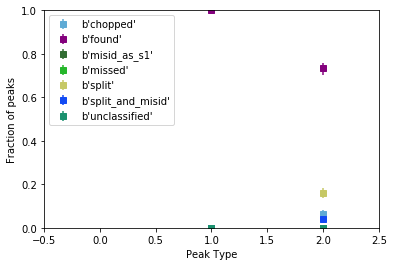

In [43]:
plot_peak_matching_histogram(thruth_vs_default,'type',bins=[-0.5,0.5,1.5,2.5])
plt.xlabel('Peak Type')
plt.show()

The custom options as introduced above:

	3.85% b'chopped'
	86.75% b'found'
	0.05% b'missed'
	8.85% b'split'
	0.50% b'split_and_misid'


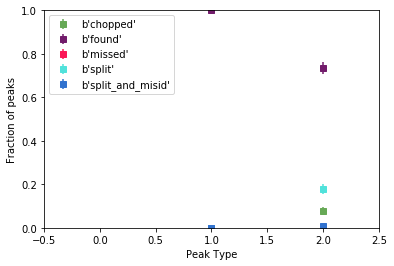

In [44]:
plot_peak_matching_histogram(thruth_vs_custom,'type',bins=[-0.5,0.5,1.5,2.5])
plt.xlabel('Peak Type')
plt.show()